In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings( "ignore" )
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [2]:

class LogitRegression() :
    def __init__( self, learning_rate, iterations ) :        
        self.learning_rate = learning_rate        
        self.iterations = iterations
          
    # Function for model training    
    def fit( self, X, Y ) :        
        # no_of_training_examples, no_of_features        
        self.m, self.n = X.shape        
        # weight initialization        
        self.W = np.zeros( self.n )        
        self.b = 0        
        self.X = X        
        self.Y = Y
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :            
            self.update_weights()            
        return self
      
    # Helper function to update weights in gradient descent
      
    def update_weights( self ) :           
        A = 1 / ( 1 + np.exp( - ( self.X.dot( self.W ) + self.b ) ) )
          
        # calculate gradients        
        tmp = ( A - self.Y.T )        
        tmp = np.reshape( tmp, self.m )        
        dW = np.dot( self.X.T, tmp ) / self.m         
        db = np.sum( tmp ) / self.m 
          
        # update weights    
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db
          
        return self
      
    # Hypothetical function  h( x ) 
      
    def predict( self, X ) :    
        Z = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) )        
        Y = np.where( Z > 0.5, 1, 0 )        
        return Y

(863, 13)
(863, 375)
   location_0  location_1  ...  diff_sym_hos_14  diff_sym_hos_15
0           0           0  ...                0                0
1           0           0  ...                0                0
2           0           0  ...                0                0
3           0           0  ...                0                0
4           0           0  ...                0                0

[5 rows x 375 columns]
Accuracy on test set by our model       :   95.40229885057471
Classification Report is : 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        77
           1       0.80      0.80      0.80        10

    accuracy                           0.95        87
   macro avg       0.89      0.89      0.89        87
weighted avg       0.95      0.95      0.95        87

...........................................


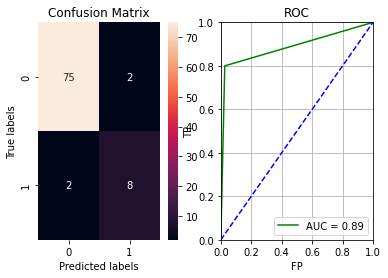

In [3]:
def main() :
      
    # Importing dataset    
    df = pd.read_csv( "/content/data.csv" )
    # X = df.iloc[:,:-1].values
    Y = df.iloc[:,-1].values
    # X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size = .10, random_state = 42)
    X = df[['location', 'country', 'gender', 'age', 'vis_wuhan', 'from_wuhan', 'symptom1', 'symptom2', 'symptom3', 'symptom4', 'symptom5', 'symptom6', 'diff_sym_hos']]
    print(X.shape)
    X.head(5)
    X_hot = pd.get_dummies(X, columns=['location', 'country','gender','age', 'vis_wuhan', 'from_wuhan', 'symptom1', 'symptom2', 'symptom3', 'symptom4', 'symptom5', 'symptom6', 'diff_sym_hos'])
    X_train, X_test, Y_train, Y_test= train_test_split(X_hot, Y, test_size = .10, random_state = 2)
    print(X_hot.shape)
    print(X_hot.head(5))
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train=scaler.transform(X_train)
    X_test=scaler.transform(X_test)  
    # Model training    
    model = LogitRegression( learning_rate = 0.1, iterations = 1000 )
      
    model.fit( X_train, Y_train )    
   
      
    Y_pred = model.predict( X_test )    
      
    correctly_classified = 0    
      
    count = 0    
    for count in range( np.size( Y_pred ) ) :  
        
        if Y_test[count] == Y_pred[count] :            
            correctly_classified = correctly_classified + 1
          
              
        count = count + 1
          
    print( "Accuracy on test set by our model       :  ", (correctly_classified / count ) * 100 )
    
    ClassificationReport = classification_report(Y_test, Y_pred)
    print('Classification Report is : \n', ClassificationReport)

    yPred = model.predict(X_test)
    CM = confusion_matrix(Y_test, Y_pred)

    ax= plt.subplot(1,2,1)
    sns.heatmap(CM, annot=True, fmt='g', ax = ax);
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    print('...........................................')
    ###############################################################
    fpr, tpr, threshold = roc_curve(Y_test, Y_pred)
    roc_auc = auc(fpr, tpr)
    plt.subplot(1,2,2)
    plt.plot(fpr, tpr, 'g', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'b--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('TP')
    plt.xlabel('FP')
    plt.title('ROC')
    plt.grid() 
  
if __name__ == "__main__" :     
    main()